In [53]:
# https://www.kaggle.com/niteshyadav3103/breast-cancer-classification?select=data.csv
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [76]:
# Load the data
df = pd.read_csv('/Users/parkj/Documents/pyDat/dataSet/breastCancerWisconsin/WIbreastCancerData.csv')

In [77]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
# Data Preprocessing
df.drop(['id'], axis = 1, inplace = True) # drop irrelevant columns 'id' and 'Unnamed'
#df.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

In [80]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [81]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [82]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [85]:
# checking for null values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

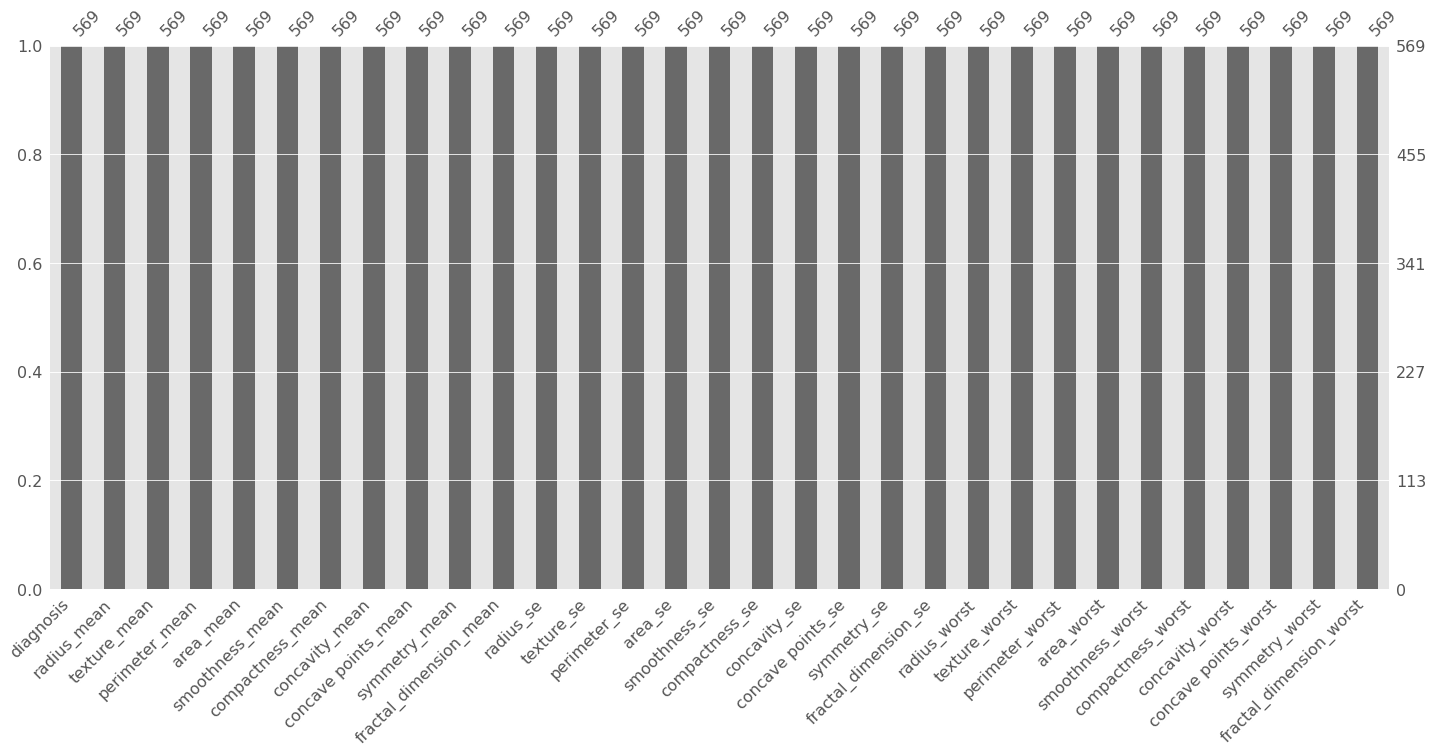

In [86]:
msno.bar(df)

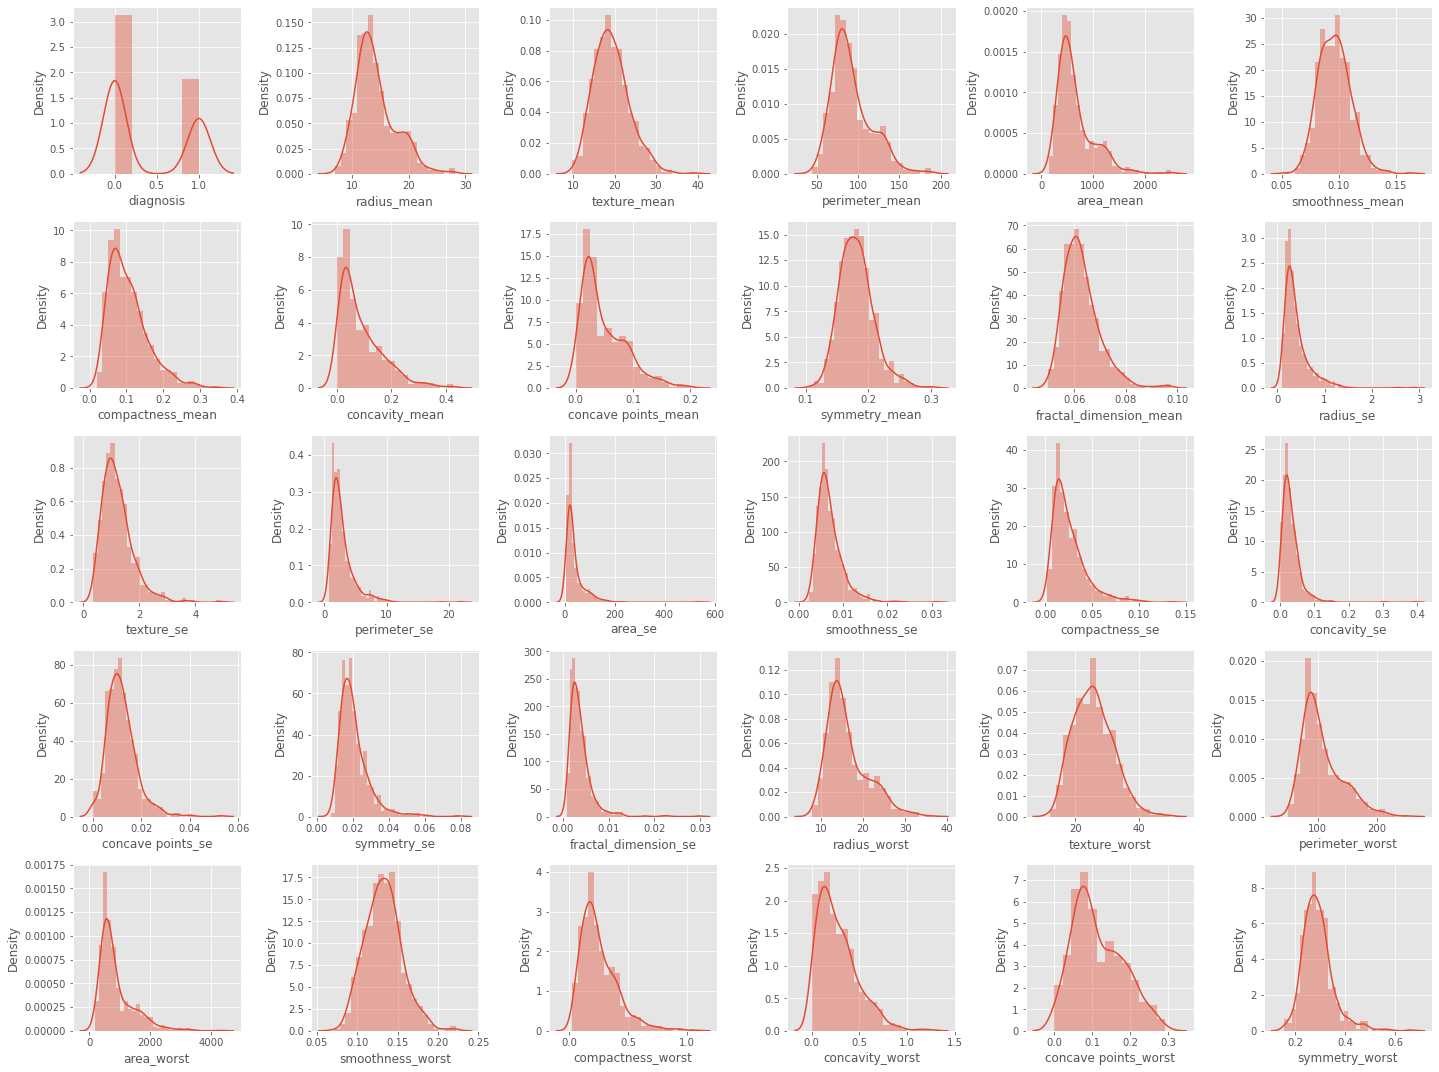

In [87]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(df[column]) # seaborn
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

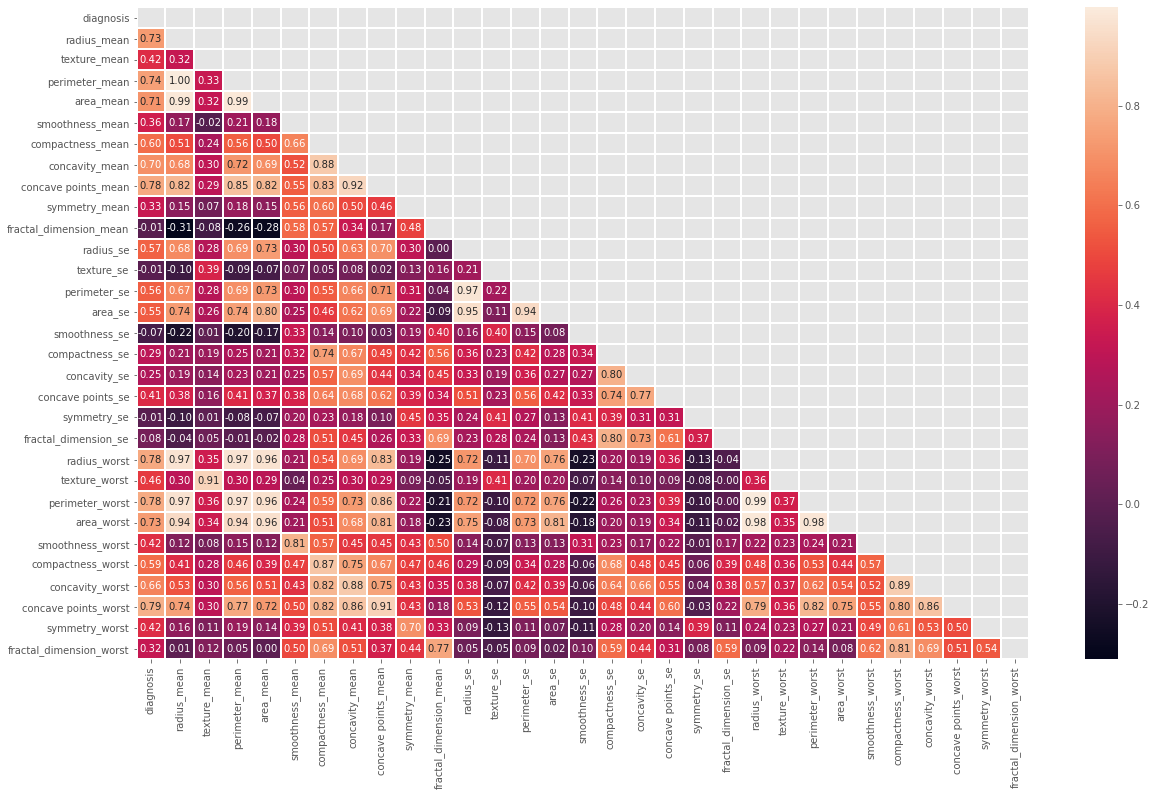

In [88]:
# heatmap
plt.figure(figsize = (20,12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [90]:
# we can see that there are many columns which are very highly correlated which causes multicolinearity so we have to remove highly correlated features.
# removing highly correlated features
corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [92]:
# creating features and label
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [98]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [99]:
# scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # standardization (centering the data - make it have zero mean and unit standard error)

X_train = scaler.fit_transform(X_train) # fit_transform joins fit which calculates parameters
X_test = scaler.transform(X_test) # transform uses the fit parameters to scale

In [100]:
# Logistic regression
# fitting data to model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [101]:
# model predictions
y_pred = log_reg.predict(X_test)

In [103]:
# accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train))) #

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test)) #
print(log_reg_acc)

0.9899497487437185
0.9590643274853801


In [104]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[106   2]
 [  5  58]]


In [105]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [108]:
# K Neighbors classifier (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [109]:
# model predictions
y_pred = knn.predict(X_test)

In [114]:
# accuracy score
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9623115577889447
0.935672514619883


In [115]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[105   3]
 [  8  55]]


In [116]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [117]:
# Support vector classifier (SVC)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {'gamma': [0.0001, 0.001, 0.01, 0.1], 
              'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [118]:
# best parameters
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [119]:
# best accuracy
grid_search.best_score_

0.9774683544303798

In [120]:
svc = SVC(C = 10, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [121]:
# model predictions
y_pred = svc.predict(X_test)

In [123]:
# accuracy score
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9874371859296482
0.9766081871345029


In [124]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[107   1]
 [  3  60]]


In [125]:
# calssification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

